In [64]:
# pipenv install pandas seaborn matplotlib scikit-learn scipy ipykernel gradio

### Carregar o dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_aluguel = pd.read_csv("./dataset/dataset_aluguel.csv")

# EDA

In [3]:
# Copiando o DF para DF EDA
df_aluguel_eda = df_aluguel.copy()

# Copiando o DF para DF bucketing
df_aluguel_bucketing = df_aluguel.copy()

In [4]:
# Transformei os valores bool para object
df_aluguel_eda['localizacao_Periferia'] = df_aluguel_eda['localizacao_Periferia'].map({True: 'Sim', False: 'Não'}).astype('object')
df_aluguel_eda['localizacao_Subúrbio'] = df_aluguel_eda['localizacao_Subúrbio'].map({True: 'Sim', False: 'Não'}).astype('object')
df_aluguel_eda['garagem'] = df_aluguel_eda['garagem'].map({0: 'Sim', 1: 'Não'}).astype('object')

In [5]:
df_aluguel_eda.head(10)

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,Sim,Sim,Não,1767.122088
1,2,192.607146,4,10.453581,Não,Sim,Não,3278.742397
2,3,159.799091,5,27.072399,Não,Sim,Não,2953.899737
3,4,139.798773,4,34.789220,Não,Não,Sim,2514.717108
4,5,73.402796,5,11.427501,Sim,Não,Sim,1942.164396
5,6,73.399178,5,8.747746,Não,Sim,Não,2141.303241
6,7,58.712542,3,49.108417,Não,Sim,Não,1625.680981
7,8,179.926422,5,25.831795,Sim,Não,Sim,2854.591908
8,9,140.167252,4,13.041459,Não,Sim,Não,2702.673542
9,10,156.210887,5,49.812685,Não,Não,Não,2456.538289


In [6]:
df_aluguel_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    object 
 5   localizacao_Periferia  100 non-null    object 
 6   localizacao_Subúrbio   100 non-null    object 
 7   valor_aluguel          100 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.4+ KB


In [7]:
df_aluguel_eda.describe()

,id,tamanho_m2,n_quartos,idade_casa,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,120.527112,2.910000,25.794810,2112.819084
std,29.011492,44.623412,1.400541,14.348628,514.314100
min,1.000000,50.828318,1.000000,0.259243,1192.728727
25%,25.750000,78.980114,1.750000,13.969405,1694.633091
50%,50.500000,119.621368,3.000000,24.827177,2069.395680
75%,75.250000,159.530468,4.000000,37.252879,2520.182679
max,100.000000,198.033040,5.000000,49.812685,3278.742397


In [8]:
# Retirar o Id pois nao é uma coluna relevante para a análise
df_aluguel_eda.drop(columns=["id"], inplace=True)
# Obs: Ja foi retirado

##### Verificar valores nulos

In [9]:
df_aluguel_eda.isnull().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64

Não apresenta valores nulos

In [10]:
# Convertendo a variavel idade_casa para inteiro
df_aluguel_eda["idade_casa"] = df_aluguel_eda["idade_casa"].astype(int)

In [11]:
df_aluguel_eda.head(15)

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36,Sim,Sim,Não,1767.122088
1,192.607146,4,10,Não,Sim,Não,3278.742397
2,159.799091,5,27,Não,Sim,Não,2953.899737
3,139.798773,4,34,Não,Não,Sim,2514.717108
4,73.402796,5,11,Sim,Não,Sim,1942.164396
5,73.399178,5,8,Não,Sim,Não,2141.303241
6,58.712542,3,49,Não,Sim,Não,1625.680981
7,179.926422,5,25,Sim,Não,Sim,2854.591908
8,140.167252,4,13,Não,Sim,Não,2702.673542
9,156.210887,5,49,Não,Não,Não,2456.538289


##### Outliers

<Axes: xlabel='valor_aluguel'>

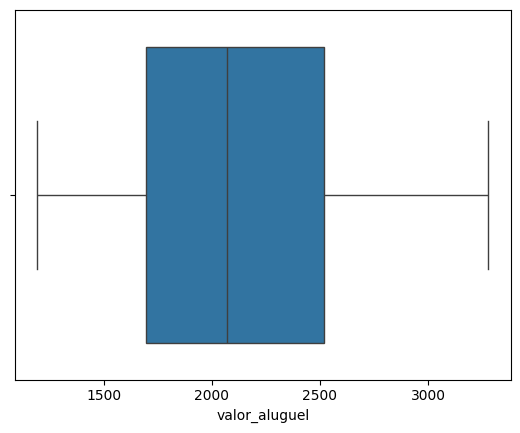

In [12]:
# Verificar os outliers
sns.boxplot(data=df_aluguel_eda, x='valor_aluguel')

<Axes: xlabel='tamanho_m2'>

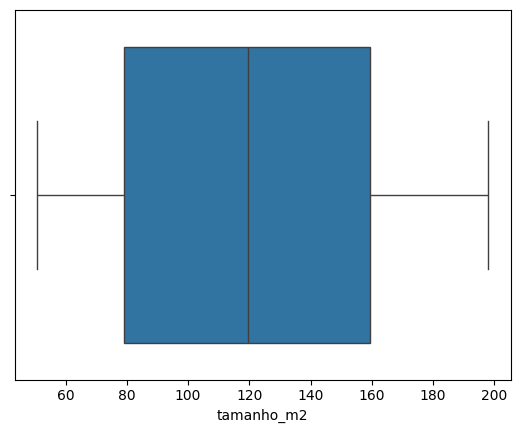

In [13]:
sns.boxplot(data=df_aluguel_eda, x='tamanho_m2')

<Axes: xlabel='idade_casa'>

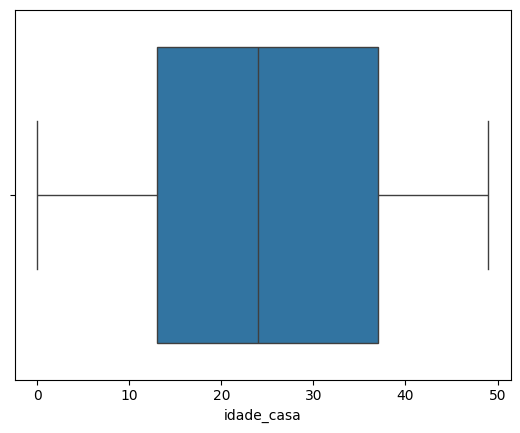

In [14]:
sns.boxplot(data=df_aluguel_eda, x='idade_casa')

<Axes: xlabel='n_quartos'>

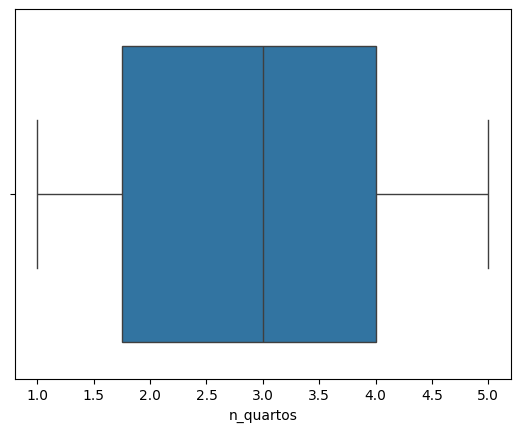

In [15]:
sns.boxplot(data=df_aluguel_eda, x='n_quartos')

<Axes: xlabel='garagem'>

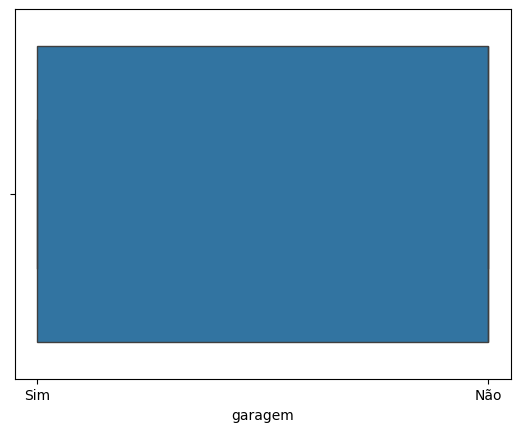

In [16]:
sns.boxplot(data=df_aluguel_eda, x='garagem')

Não apresenta outliers, portanto não é preciso fazer tratamento

##### Análise gráfica

<Axes: xlabel='valor_aluguel', ylabel='localizacao_Periferia'>

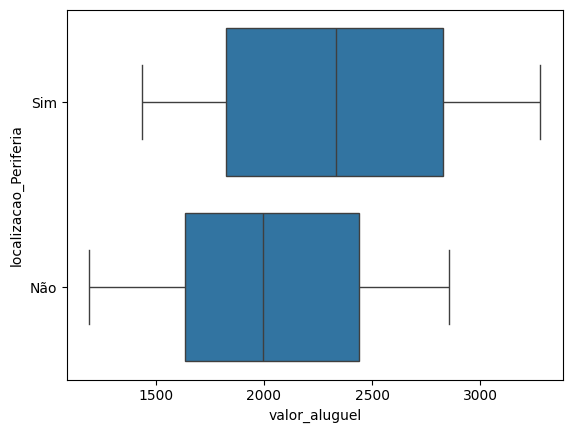

In [17]:
# Valores categoricos
sns.boxplot(data=df_aluguel_eda, x='valor_aluguel', y='localizacao_Periferia')

<Axes: xlabel='valor_aluguel', ylabel='localizacao_Subúrbio'>

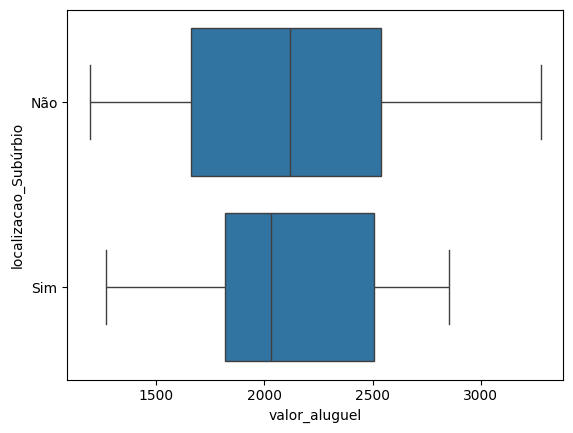

In [18]:
sns.boxplot(data=df_aluguel_eda, x='valor_aluguel', y='localizacao_Subúrbio')

<Axes: xlabel='valor_aluguel', ylabel='garagem'>

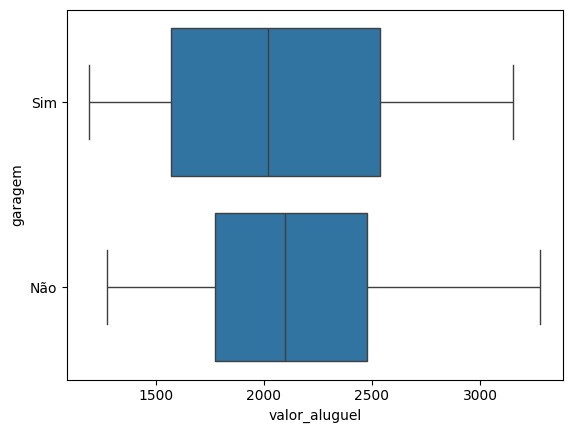

In [19]:
sns.boxplot(data=df_aluguel_eda, x='valor_aluguel', y='garagem')

<Axes: xlabel='tamanho_m2', ylabel='valor_aluguel'>

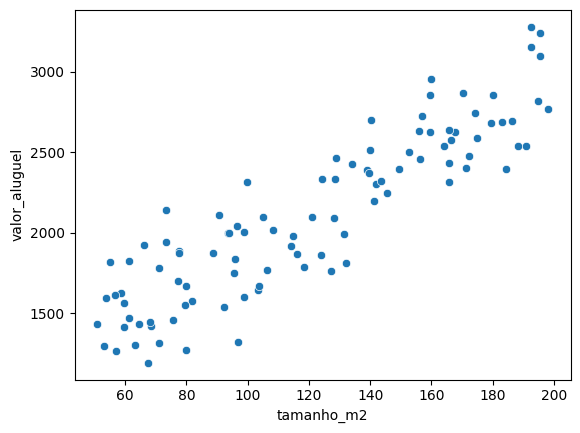

In [20]:
# Valores númericos
sns.scatterplot(data=df_aluguel_eda, x='tamanho_m2', y='valor_aluguel')

<Axes: xlabel='tamanho_m2', ylabel='n_quartos'>

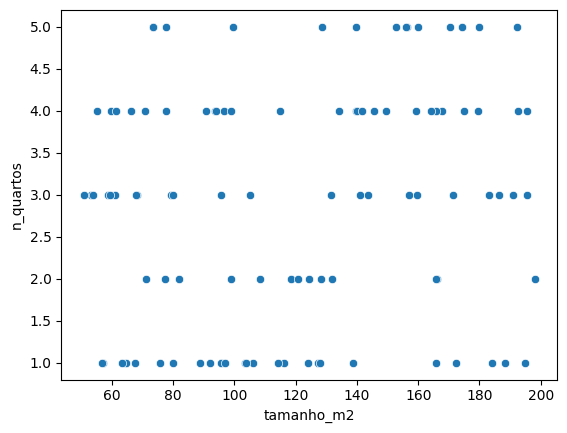

In [21]:
sns.scatterplot(data=df_aluguel_eda, x='tamanho_m2', y='n_quartos')

<Axes: xlabel='tamanho_m2', ylabel='idade_casa'>

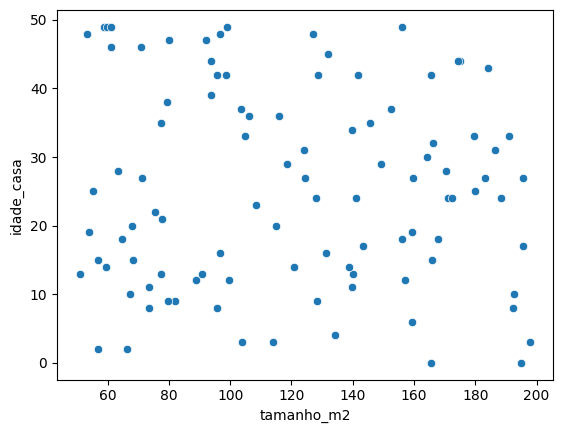

In [22]:
sns.scatterplot(data=df_aluguel_eda, x='tamanho_m2', y='idade_casa')

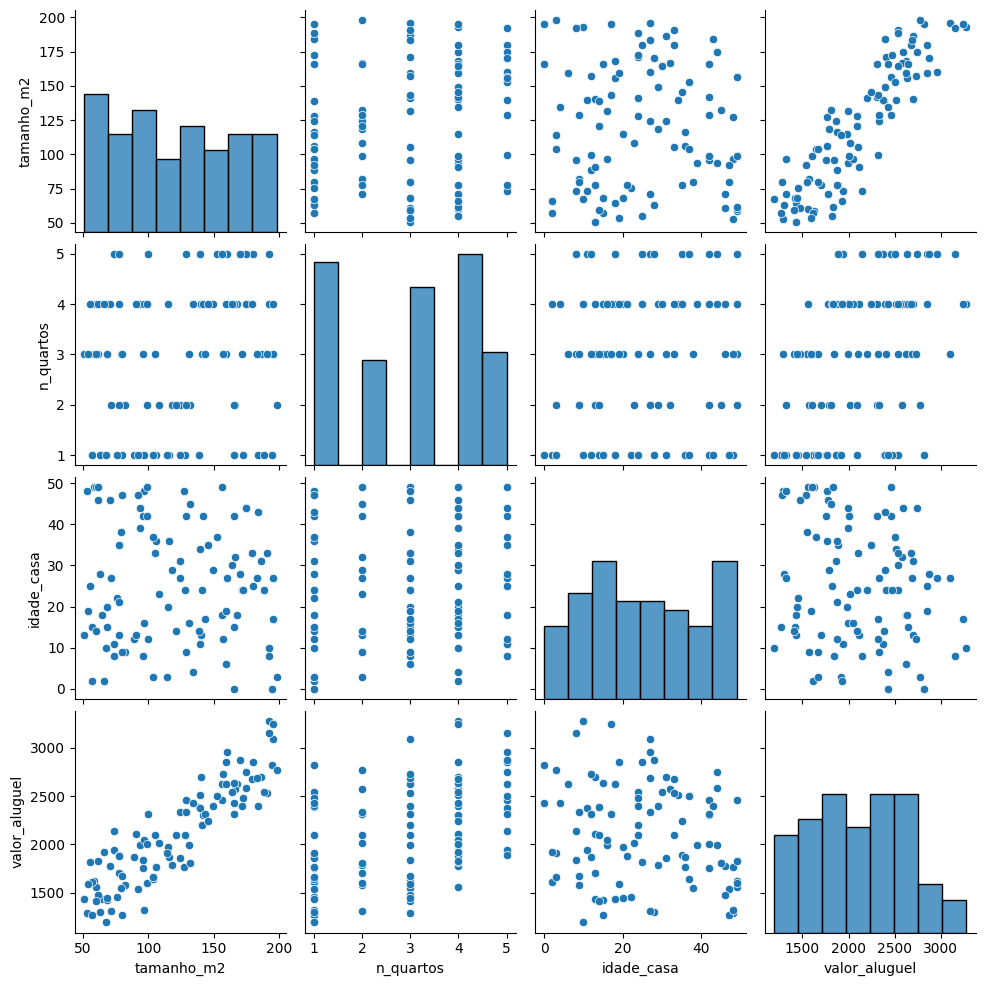

In [23]:
sns.pairplot(df_aluguel_eda)

In [24]:
# Transformar as variaveis categoricas em numericas
df_aluguel_eda = pd.get_dummies(df_aluguel_eda, columns=['garagem',	'localizacao_Periferia', 'localizacao_Subúrbio'], dtype='int64')

In [25]:
df_aluguel_eda.head(10)

,tamanho_m2,n_quartos,idade_casa,valor_aluguel,garagem_Não,garagem_Sim,localizacao_Periferia_Não,localizacao_Periferia_Sim,localizacao_Subúrbio_Não,localizacao_Subúrbio_Sim
0,106.181018,1,36,1767.122088,0,1,0,1,1,0
1,192.607146,4,10,3278.742397,1,0,0,1,1,0
2,159.799091,5,27,2953.899737,1,0,0,1,1,0
3,139.798773,4,34,2514.717108,1,0,1,0,0,1
4,73.402796,5,11,1942.164396,0,1,1,0,0,1
5,73.399178,5,8,2141.303241,1,0,0,1,1,0
6,58.712542,3,49,1625.680981,1,0,0,1,1,0
7,179.926422,5,25,2854.591908,0,1,1,0,0,1
8,140.167252,4,13,2702.673542,1,0,0,1,1,0
9,156.210887,5,49,2456.538289,1,0,1,0,1,0


<Axes: >

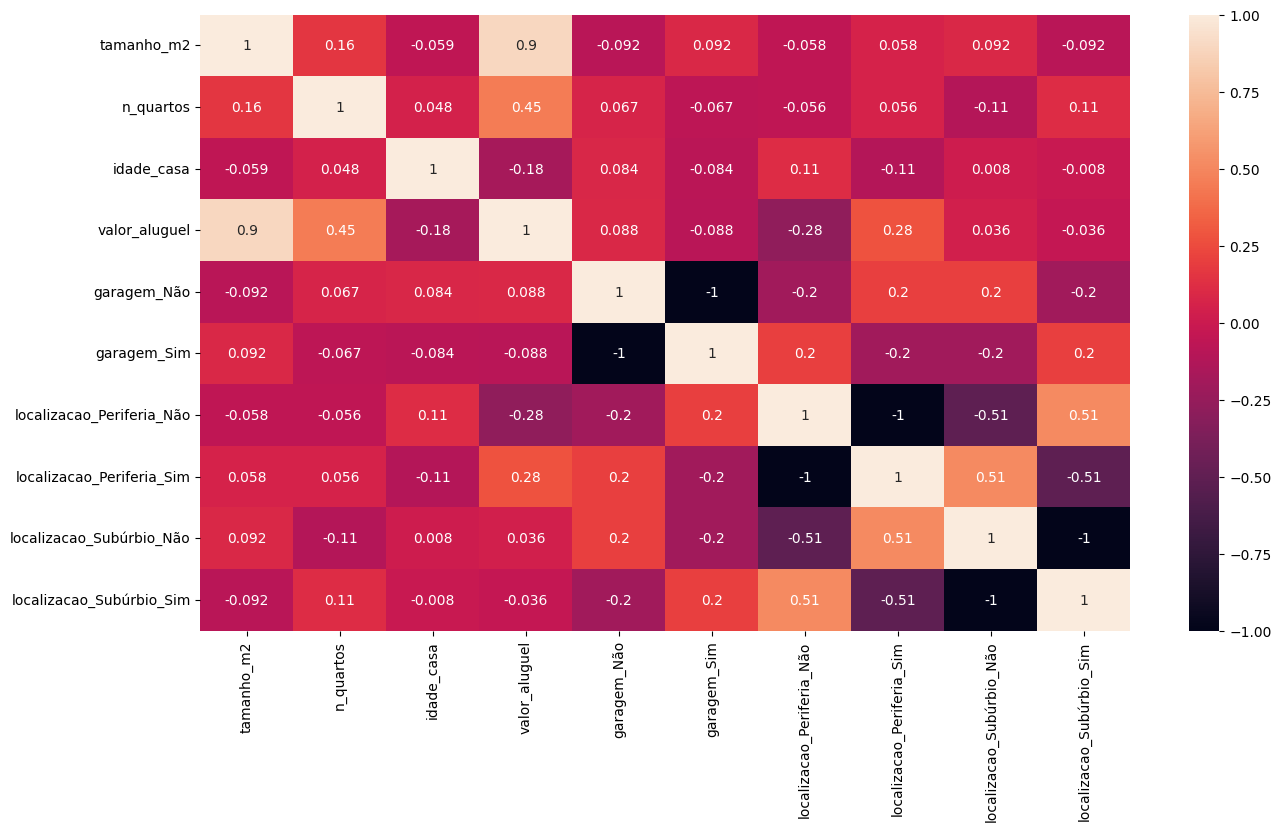

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_aluguel_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

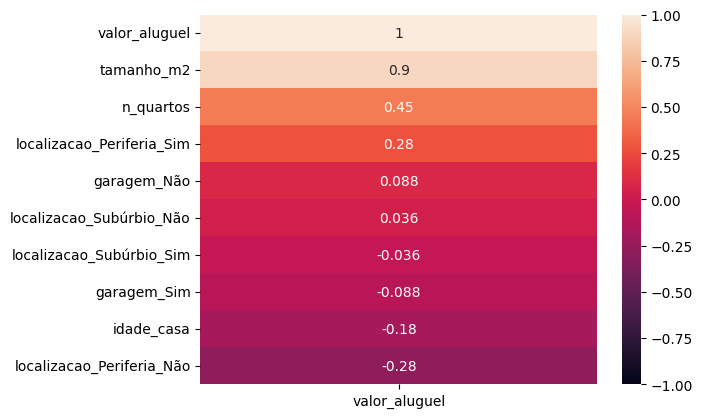

In [27]:
# Em formato de ranking
sns.heatmap(df_aluguel_eda.corr()[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False), vmin=-1, vmax=1, annot=True)

In [28]:
# Buckting de tamanho_n2
bins = [50, 80, 110, 140, 170, 199]
labels = ['50-79', '80-109', '110-139','140-169', '170-199']

df_aluguel_bucketing['escala_tamanho'] = pd.cut(x=df_aluguel_bucketing['tamanho_m2'], bins=bins, labels=labels, include_lowest=True)

In [29]:
df_aluguel_bucketing.head(15)

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel,escala_tamanho
0,1,106.181018,1,36.760806,0,True,False,1767.122088,80-109
1,2,192.607146,4,10.453581,1,True,False,3278.742397,170-199
2,3,159.799091,5,27.072399,1,True,False,2953.899737,140-169
3,4,139.798773,4,34.789220,1,False,True,2514.717108,110-139
4,5,73.402796,5,11.427501,0,False,True,1942.164396,50-79
5,6,73.399178,5,8.747746,1,True,False,2141.303241,50-79
6,7,58.712542,3,49.108417,1,True,False,1625.680981,50-79
7,8,179.926422,5,25.831795,0,False,True,2854.591908,170-199
8,9,140.167252,4,13.041459,1,True,False,2702.673542,140-169
9,10,156.210887,5,49.812685,1,False,False,2456.538289,140-169


<Axes: xlabel='escala_tamanho', ylabel='valor_aluguel'>

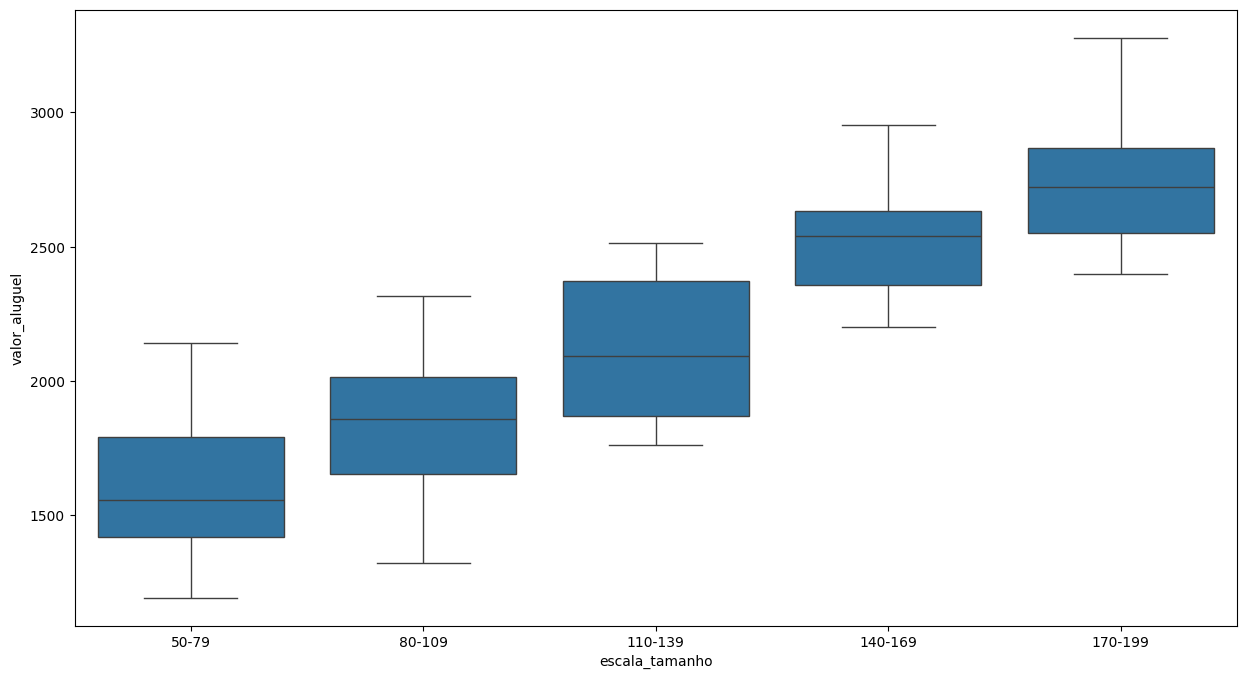

In [30]:
plt.figure(figsize=(15, 8))
sns.boxplot(df_aluguel_bucketing, x='escala_tamanho', y='valor_aluguel')

Fim da EDA

### Construção do modelo

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [32]:
df_aluguel.drop(columns=["id"], inplace=True)
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [33]:
X = df_aluguel.drop(columns='valor_aluguel', axis=1)
y = df_aluguel['valor_aluguel']

In [34]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)
# 30% dos dados serão usados para o conjunto de teste (x_test, y_test), 
# e os restantes 70% dos dados serão usados para o conjunto de treinamento (X_train, Y_train).

In [35]:
y_test.shape

(30,)

In [36]:
# Transformando as variaveis numericas e booleanas para categoricas
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [37]:
df_aluguel.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396


In [38]:
df_aluguel['localizacao_Periferia'] = df_aluguel['localizacao_Periferia'].map({True: 'Sim', False: 'Não'}).astype('object')
df_aluguel['localizacao_Subúrbio'] = df_aluguel['localizacao_Subúrbio'].map({True: 'Sim', False: 'Não'}).astype('object')

In [39]:
df_aluguel['garagem'] = df_aluguel['garagem'].map({0: 'Sim', 1: 'Não'}).astype('object')

In [40]:
df_aluguel.isnull().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64

In [41]:
# Nomes das Categoricas
# È importante ressaltar que essas tranformação só pode ser realizada depois do train_test_spli
colunas_categoricas = ['garagem', 'localizacao_Periferia', 'localizacao_Subúrbio']
colunas_numericas = ['tamanho_m2', 'n_quartos',	'idade_casa']

In [42]:
# Transformar variaveis - apesar de não haver valores nulos, irei fazer o Pipeline para ter mais robusters no projeto
# e para testes futuros
transformers_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore")) # Converter a variavel em binario(0 para nao, 1 para sim), e cria novas colunas
])

In [43]:
transformers_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()) # Vai tansformar cada valor na escala Zscore, usando a media e o desvio padrao
])

In [44]:
# Column tranformers
preprocessador = ColumnTransformer(
    transformers=[
        ('num', transformers_numericas, colunas_numericas),
        ('cat', transformers_categoricas, colunas_categoricas)
    ]
)

In [45]:
# trainar o modelo
model_reg = Pipeline(steps=[
    ('prepocessador', preprocessador),
    ('regressor', LinearRegression())
    ]
)

In [46]:
model_reg.fit(X_train, y_train)

Pipeline(steps=[('prepocessador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tamanho_m2', 'n_quartos',
                                                   'idade_casa']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['garagem',
                                                   'localizacao_Periferia',
                                                   'localizacao_Subúrbio'])])),
                ('regressor', LinearRegression())])

### Avaliação do Modelo

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import pingouin

In [48]:
Y_pred = model_reg.predict(x_test)

In [49]:
# r2_squared
r2_score(y_test, Y_pred)

0.9916999333653813

In [50]:
# MAE
mean_absolute_error(y_test, Y_pred)

40.155758399393356

In [51]:
# RMSE 
root_mean_squared_error(y_test, Y_pred)

50.45608982382557

Na análise de métricas, o modelo se saiu bem

In [52]:
# Calcular os residuos
from scipy.stats import zscore
residuos = y_test - Y_pred

In [53]:
residuos_std = zscore(residuos) # residuos padronizados

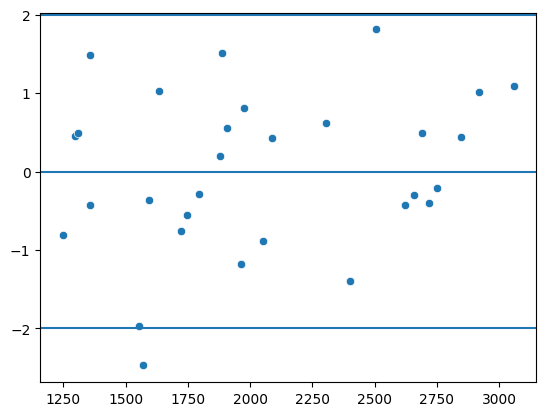

In [54]:
sns.scatterplot(x=Y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

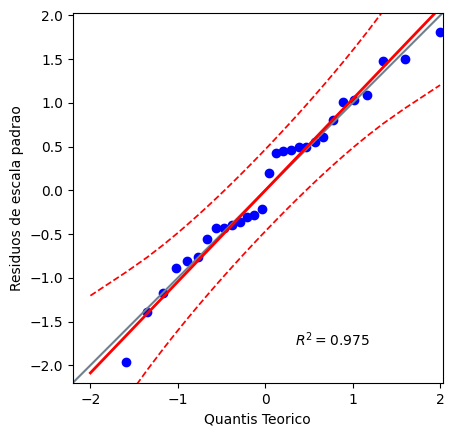

In [55]:
pingouin.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis Teorico")
plt.ylabel("Residuos de escala padrao")
plt.show()

In [56]:
# Testes de normalidade

from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [57]:
# Shapiro wilk
stat_shpiro, p_value_shapiro = shapiro(residuos_std)

In [58]:
print("Teste de Shapiro")
print(f"Estatistica do Teste: {stat_shpiro} e P-Value: {p_value_shapiro}")

Teste de Shapiro
Estatistica do Teste: 0.9747661268191615 e P-Value: 0.6758377246738067


In [59]:
# Teste de Kolmogov-Smirnov
stat_ks, p_value_ks = kstest(residuos_std, 'norm')

In [60]:
print("Teste de Kolmonov-Smirnov")
print(f"Estatistica do Teste: {stat_ks} e P-Value: {p_value_ks}")

Teste de Kolmonov-Smirnov
Estatistica do Teste: 0.13061402781150822 e P-Value: 0.6382953474679312


In [61]:
# Teste de lillierfors
stat_ll, p_value_ll = lilliefors(residuos_std, dist='norm', pvalmethod='table')
print("Teste de Lillierfors")
print(f"Estatistica do Teste: {stat_ll} e P-Value: {p_value_ll}")

Teste de Lillierfors
Estatistica do Teste: 0.12801518362890618 e P-Value: 0.2350382608175265


In [62]:
# Teste de anderson
stat_and, critical_value, significance_and = anderson(residuos_std, dist='norm')

In [63]:
print("Teste de Anderson")
print(f"Estatistica do Teste: {stat_and} e Valores criticos: {critical_value[2]}")

Teste de Anderson
Estatistica do Teste: 0.29625019290955734 e Valores criticos: 0.712


Todos os teste de normalidade rejeitaram a hipotese H1

In [76]:
# Teste de homocedasticidade 
pipe = Pipeline(steps=[
    ('preprocessador', preprocessador)
    ])
X_train_transformed = pipe.fit_transform(x_test)

In [77]:
test_goldfeld = het_goldfeldquandt(residuos, X_train_transformed)

In [78]:
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]

In [80]:
print(f"Estatistica do Teste: {stat_goldfeld} e P-value: {p_value_goldfeld}")

Estatistica do Teste: 0.36659755134725913 e P-value: 0.9113575737352348


Como o P-value é maior que o Estatistica do Teste, então existe homocedasticidade

#### Realizar Predições individuais

In [ ]:
predicao = {
    "tamanho_m2": 120.000,
    "n_quartos": 3,
    "idade_casa": 10,
    "garagem": 1,
    "localizacao_Periferia": True,
    "localizacao_Subúrbio": False
}

In [83]:
df_simple = pd.DataFrame(predicao, index=[1])

In [84]:
df_simple

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio
1,120.0,3,10,1,True,False


In [85]:
model_reg.predict(df_simple)

array([2510.88566258])

In [86]:
# Salvar modelo
import joblib

joblib.dump(model_reg, "./modelo_aluguel.pkl")

['./modelo_aluguel.pkl']